# Домашняя работа 5. Прогнозирование.

Вариант 3.

Лазарев Эдуард Артемович
N33471

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 6]

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
# Загружаем данные

# Считываем первые 112 строк, потому что последние восемь месяцев 
# не имеют данных и их нам нужно спрогнозировать.
data = pd.read_csv("Chicago_hotels.csv", delimiter=";", decimal=",", nrows=112)
len(data)

112

Проверяем правильность данных

In [4]:
data

,date1,date2,x1,x2,x3,x4
0,January,1994,44.3,104.04,51.9,72.15
1,February,1994,54.7,102.74,60.1,73.47
2,March,1994,61.9,105.23,65.0,74.91
3,April,1994,69.1,113.63,69.8,79.06
4,May,1994,70.8,120.77,72.4,82.07
...,...,...,...,...,...,...
107,December,2002,54.8,148.95,46.6,99.10
108,January,2003,51.6,132.89,45.3,92.88
109,February,2003,52.7,127.44,50.8,90.99
110,March,2003,65.0,147.32,55.9,99.62


In [5]:
data.dtypes

date1     object
date2      int64
x1       float64
x2       float64
x3       float64
x4       float64
dtype: object

Видим что данные считались верно и выбросов нету.

Построим график коэффициента загрузки гостиниц в процентах (столбец `x3`).

Text(0, 0.5, 'log10 от процентов')

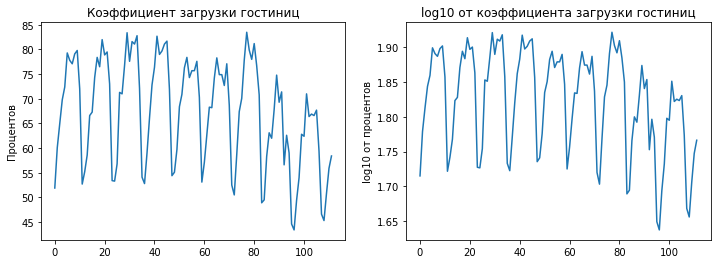

In [6]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
data['x3'].plot(ax=ax1)
ax1.set_title(u'Коэффициент загрузки гостиниц')
ax1.set_ylabel(u'Процентов')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(data['x3'])).plot(ax=ax2)
ax2.set_title(u'log10 от коэффициента загрузки гостиниц')
ax2.set_ylabel(u'log10 от процентов')

Отвечаем на вопросы связанные с рядом.

    1) У ряда наблюдается пораболический тренд.
    2) У ряда аддитивная сезонность.
    3) Изменение ряда не набдюдается.
    4) Выбросы у ряда не обнаружены.

Вывод: будем прогнозировать коэффициент загрузки с помощью модели линейной регрессии. 

$$\log y_i = \alpha_0 + \alpha_1 \cdot x_i + \alpha_2 \cdot x_i^2 + c(x_i) + \varepsilon_i,$$

где $y_i$ -- коэффициент загрузки, $x_i$ -- порядковый номер месяца, $c(x_i)$ -- сезонная составляющая, $\varepsilon_i$ -- случайные отклонения.

Создадим два предиктора `month_num` - порядковый номер пары (месяц, год), `month_num_2` - квадрат порядкового номера. Так же удалим лишние столбцы.

In [7]:
data_2 = data.drop(columns=["date1", "date2", "x1", "x2", "x4"])
data_2['month_num'] = range(1, len(data_2) + 1)
data_2["month_num_2"] = data_2["month_num"] ** 2
data_2

,x3,month_num,month_num_2
0,51.9,1,1
1,60.1,2,4
2,65.0,3,9
3,69.8,4,16
4,72.4,5,25
...,...,...,...
107,46.6,108,11664
108,45.3,109,11881
109,50.8,110,12100
110,55.9,111,12321


Создадим новые переменные - индикаторы месяцев

In [8]:
len(data_2) // 12 + 1

10

In [9]:
data_2["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0]*(len(data_2) // 12 + 1))[0:len(data_2)]
data_2["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0]*(len(data_2) // 12 + 1))[0:len(data_2)]
data_2["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0]*(len(data_2) // 12 + 1))[0:len(data_2)]
data_2["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0]*(len(data_2) // 12 + 1))[0:len(data_2)]
data_2["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0]*(len(data_2) // 12 + 1))[0:len(data_2)]
data_2["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0]*(len(data_2) // 12 + 1))[0:len(data_2)]
data_2["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0]*(len(data_2) // 12 + 1))[0:len(data_2)]
data_2["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0]*(len(data_2) // 12 + 1))[0:len(data_2)]
data_2["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0]*(len(data_2) // 12 + 1))[0:len(data_2)]
data_2["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0]*(len(data_2) // 12 + 1))[0:len(data_2)]
data_2["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0]*(len(data_2) // 12 + 1))[0:len(data_2)]
data_2["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1]*(len(data_2) // 12 + 1))[0:len(data_2)]
data_2

,x3,month_num,month_num_2,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,51.9,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,60.1,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,65.0,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,69.8,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,72.4,5,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,46.6,108,11664,0,0,0,0,0,0,0,0,0,0,0,1
108,45.3,109,11881,1,0,0,0,0,0,0,0,0,0,0,0
109,50.8,110,12100,0,1,0,0,0,0,0,0,0,0,0,0
110,55.9,111,12321,0,0,1,0,0,0,0,0,0,0,0,0


Создаем матрицу предикторов.
Убираем из нее отклик и столбец индикаторов базового месяца
За базу берем январь.

In [10]:
X = data_2.drop(columns=["x3", "m01"])
X

,month_num,month_num_2,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,2,4,1,0,0,0,0,0,0,0,0,0,0
2,3,9,0,1,0,0,0,0,0,0,0,0,0
3,4,16,0,0,1,0,0,0,0,0,0,0,0
4,5,25,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,108,11664,0,0,0,0,0,0,0,0,0,0,1
108,109,11881,0,0,0,0,0,0,0,0,0,0,0
109,110,12100,1,0,0,0,0,0,0,0,0,0,0
110,111,12321,0,1,0,0,0,0,0,0,0,0,0


Создаем матрицу (столбец) откликов

In [11]:
Y = data_2["x3"]
Y

0      51.9
1      60.1
2      65.0
3      69.8
4      72.4
       ... 
107    46.6
108    45.3
109    50.8
110    55.9
111    58.4
Name: x3, Length: 112, dtype: float64

In [12]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [13]:
coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,51.957593
1,month_num,0.188256
2,month_num_2,-0.002588
3,m02,6.098971
4,m03,13.403117
5,m04,16.232438
6,m05,20.973159
7,m06,26.772891
8,m07,23.077797
9,m08,24.465657


Проверим есть ли придикторы, которые можно прировнять к нулю.

In [14]:
from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef

In [15]:
regression_coef(model, X, Y)

,predictor,coef,pvalue
0,intercept,51.957593,0.000000e+00
1,month_num,0.188256,3.199880e-07
2,month_num_2,-0.002588,3.108624e-14
3,m02,6.098971,8.270705e-06
4,m03,13.403117,0.000000e+00
5,m04,16.232438,0.000000e+00
6,m05,20.973159,0.000000e+00
7,m06,26.772891,0.000000e+00
8,m07,23.077797,0.000000e+00
9,m08,24.465657,0.000000e+00


Видим что индикатор декабря можно при желании опустить.

Сравним подгонку и ряд из коэффициентов загрузки.

,pred,real
0,52.143262,51.9
1,58.422726,60.1
2,65.902191,65.0
3,68.901655,69.8
4,73.807344,72.4
...,...,...
107,41.798208,46.6
108,41.733877,45.3
109,47.454413,50.8
110,54.374949,55.9


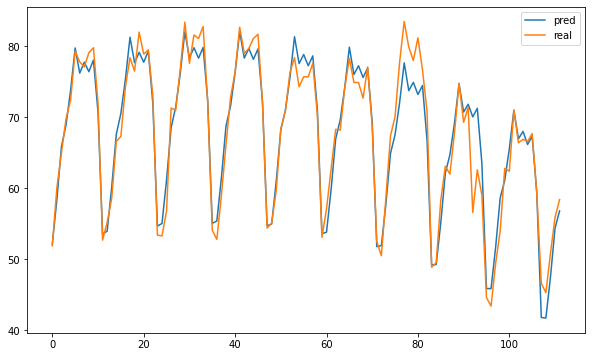

In [16]:
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': Y})
pred.plot()
pred

Перейдём к прогназированию.

Подготовим матрицу date_3 для вычисления прогнозов на восемь месяцев вперёд.

Добавим в ней номер меяца и его квадрат

In [17]:
data_3= pd.DataFrame()

data_3['month_num'] = range(len(data)+1, len(data)+9)
data_3['month_num_2'] = data_3 ** 2

Добавляем индикаторы месяцев. Базовый месяц опускаем.

In [18]:
# data_3["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0])[len(data) % 12 + 1: 12]
data_3["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0])[len(data) % 12: 12]
data_3["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0])[len(data) % 12: 12]
data_3["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0])[len(data) % 12: 12]
data_3["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0])[len(data) % 12: 12]
data_3["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0])[len(data) % 12: 12]
data_3["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0])[len(data) % 12: 12]
data_3["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0])[len(data) % 12: 12]
data_3["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0])[len(data) % 12: 12]
data_3["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0])[len(data) % 12: 12]
data_3["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0])[len(data) % 12: 12]
data_3["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1])[len(data) % 12: 12]

In [19]:
data_3

,month_num,month_num_2,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,113,12769,0,0,0,1,0,0,0,0,0,0,0
1,114,12996,0,0,0,0,1,0,0,0,0,0,0
2,115,13225,0,0,0,0,0,1,0,0,0,0,0
3,116,13456,0,0,0,0,0,0,1,0,0,0,0
4,117,13689,0,0,0,0,0,0,0,1,0,0,0
5,118,13924,0,0,0,0,0,0,0,0,1,0,0
6,119,14161,0,0,0,0,0,0,0,0,0,1,0
7,120,14400,0,0,0,0,0,0,0,0,0,0,1


Получаем прогноз на восемь месяцев вперёд.

In [20]:
print(*model.predict(data_3), sep="\n")

61.162244338172115
66.5628394608895
62.463434583606826
63.44180748410196
61.5424026068193
62.62077550731442
54.72137063003176
36.977521308304645


In [21]:
#  матрица с подгонкой
pred['forecast'] = np.nan
pred.head()

,pred,real,forecast
0,52.143262,51.9,NaN
1,58.422726,60.1,NaN
2,65.902191,65.0,NaN
3,68.901655,69.8,NaN
4,73.807344,72.4,NaN


In [22]:
pred_2 = pd.DataFrame(model.predict(data_3), columns=['forecast'])
pred_2['real'] = np.nan
pred_2['pred'] = np.nan

pred_2

,forecast,real,pred
0,61.162244,NaN,NaN
1,66.562839,NaN,NaN
2,62.463435,NaN,NaN
3,63.441807,NaN,NaN
4,61.542403,NaN,NaN
5,62.620776,NaN,NaN
6,54.721371,NaN,NaN
7,36.977521,NaN,NaN


Объединяем матрицы, задаем новые индексы

In [23]:
pred_3 = pd.concat(
    [pred, pred_2],
    sort=False
).reset_index(drop=True)

<AxesSubplot:>

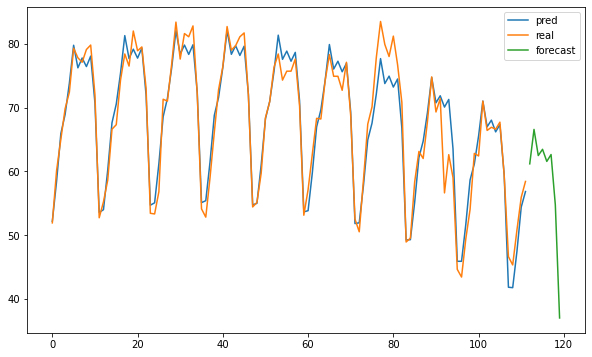

In [24]:
pred_3.plot()

## Вывод
Полученаня модель адекватно отражает характер изменения исходных данных.

Далее представлен полученный прогноз.

Месяц | Год | Процент загруженности (%)
:-: |:-: | -:
Май | 2003 | 61.162244338172115
Июнь | 2003 | 66.5628394608895
Июль | 2003 | 62.463434583606826
Август | 2003 | 63.44180748410196
Сентябрь | 2003 | 61.5424026068193
Октябрь | 2003 | 62.62077550731442
Ноябрь | 2003 | 54.72137063003176
Декабрь | 2003 | 36.977521308304645